In [ ]:

#AE(autoencoder) -> variational AE -> GAN(복잡해서 찾아낼수없는 특징을 찾아준다 , 왼쪽을 보는 이미지+ 오른쪽을 보는이미지 2개만 있어도 왼쪽에서 오른쪽으로 돌아가는 모습을 보여줌 )
#                                    GAN: 화질개선에도 쓰인다   (정확한 자기자신 이미지의 특징을 뽑는다)                             

#FFNN : 전진신경망
#CNN : 특징추출 (주변을고려한특징)
#RNN  : 특징추출 (순서를고려한특징)
    
    
#Autoencoder, VAE, gAN : 확률적 특성 (수직,수평특성추출)      : 생성모델이라고 한다 
#AE : 타켓이 자기자신이다 -> 노이즈가 없는 자기자신의 사진을 생성 ?
#VARIATION AE -> GAN(GENERATOR 와 DISCRIMINATE 의 2개의 회로로 구성) 

# 즉 TENSORFLOW 는 특징을 찾아내는것이다 

#머신러닝에서 비지도학습 ; PCA, MDS, T-SNE 


import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph() 

#encoding  을 하기 위해서  
char_arr = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz단어나무놀이소녀연습사랑']  # 단어들이 하나씩 떨어져서 들어갈것이다
#>>>[ S, E, P ...... ]
#>>> 0 , 1, 2 ..       번호도 이렇게 설정이 된다 

# 범주형데이터로 만들어준다 ( S 가 0번 , E 가 1번 .. )
num_dic = {n: i for i, n in enumerate(char_arr)}
dic_len = len(num_dic)
print(dic_len)  # 42

# 지금하는것은 번역망이다 ( seq2seq 번역망)
seq_data = [['word', '단어'],['wood','나무'],
           ['game','놀이'], ['girl','소녀'],
            ['test', '연습'], ['love','사랑']] # word 가 나오면 단어가 튀어나오게 학습을 시키려고 한다 
def make_batch(seq_data):
    input_batch = []
    output_batch = []
    target_batch = []
    for seq in seq_data: # 입력되는 데이터에서 하나씩 빼온다 ( 처음에 ['word', '단어']) 가 나온다 
        input = [num_dic[n] for n in seq[0]]  # num_dic 에 넣어주게 되면 키이데이터에 의해 번호로 바뀐다 -> word 는 25,17, .. 이런식으로 바뀜
        # 첫번쨰 입력되는 데이터는 'word' 이 학습된 smoking gun 
        output = [num_dic[n] for n in ('S' + seq[1])]# 훈련된 특징값 시작 (아웃풋에 S 가 붙음) 
        target = [num_dic[n] for n in (seq[1] + "E")] # 타켓에 E 자를 붙이는것  (끝을 확인하기 위해서 )  
        #identity matrix : 단위행렬 -> one_hot-encoding 
        # 1, 0,0,0,0,0,0,0 (나머지는 0으로)
        # 0, 1, 0,0,0,0,0,0
        # 0,0,1 ,0,0, # 이런식으로 되어있는 해열ㄹ이다 
        input_batch.append(np.eye(dic_len)[input])  # 25,17 # 2차원 배열이 만들어진다 
        output_batch.append(np.eye(dic_len)[output]) # output 은 2x42 로 만들어진다 
        target_batch.append(target)  # 
    return input_batch, output_batch, target_batch

learning_rate = 0.01 
n_hidden = 128 # neuros 출력이 128 차 
total_epoch = 100
n_class = n_input = dic_len  

enc_input = tf.placeholder(tf.float32, [None, None, n_input])
dec_input = tf.placeholder(tf.float32 , [None, None, n_input])
targets = tf.placeholder(tf.int64, [None, None])

with tf.variable_scope('encode'):
    # FFN 한개 입력 -> 가중치-> 출력(n_hidden)
    enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden) # 입력 42x128
    # 과적합 방지하기 위해 계산회로를 생략 -> random 하게 생략 
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5, seed=100)
     # 셀이 
    outputs, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input, dtype = tf.float32)
with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)  #128 
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)
    # 셀이 4개, 셀당 42개의 데이터가 입력 
    outputs. dec_states = tf.nn.dynamic_rnn(dec_cell, dec_input,
                                            initial_state = enc_states, dtype=tf.float32)
    # 2x42
    # 앞의 인코더망에서 출력된 states 값 : 마지막 cell 의 출력
    # 앞의 데이터를 다 고려한 특징
    # 두개의 망을 연결  initial_state =enc_states 
# 6x2x128


model = tf.layers.dense(outputs, n_class, activation=None)
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model, labels=targets))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [1]:
import tensorflow as tf 
import numpy as np 
from tensorflow.python.framework import ops
ops.reset_default_graph()

# encoding을 하기 위해서. 
# 데이터가 즉 문자가 슬라이싱 되어서 들어감 [S, E, P]
char_arr = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz단어나무놀이소녀연습사랑'] 
num_dic = {n: i for i, n in enumerate(char_arr)}
# enumerate ==> 각 문자에다가 데이터를 달아주겠다. 
dic_len = len(num_dic)
print(dic_len)# 42개가 나온다. 

seq_data = [['word', '단어'], ['wood', '나무'],
            ['game', '놀이'], ['girl', '소녀'],
            ['test', '연습'], ['love', '사랑']]

def make_batch(seq_data):
    input_batch = []
    output_batch = []
    target_batch = []
    for seq in seq_data:  #['word', '단어']
        input = [num_dic[n] for n in seq[0]]  # 위에서 인덱싱한 문자를 글자로 나타내어 준다
        output = [num_dic[n] for n in ('S' + seq[1])]# 여기서부터 시작 char_arr의 첫번째 문자가 S임 # 훈련된 특징값 시작
        # 첫번째 입력 되는 데이터는 'word'가 학습된 smoking gun(?)  # 이자리를 비워놓는것이 안되니까 S를 넣어준다, 따라서 의미가 없음. 
        target = [num_dic[n] for n in (seq[1]) + 'E'] # 끝을 확인하기 위해서(???)  #출력할때 E까지만 출력시켜라 
        input_batch.append(np.eye(dic_len)[input]) # 42개의 대각행렬을 만들어라 (단위행렬)  # 2차원 배열 2X 42배열
        # 단위 행렬을 원핫인코딩하는 역활
        #1, 00000000
        #0, 1, 000000000
        # 0,0,1
        output_batch.append(np.eye(dic_len)[output])
        target_batch.append(target)
    return input_batch, output_batch, target_batch
learning_rate = 0.01
n_hidden = 128  # neuron 출력이 128차
total_epoch = 100
n_class = n_input = dic_len  # 41
# encoder, decoder 용 데이터 주입변수
enc_input = tf.placeholder(tf.float32, [None, None, n_input])
dec_input = tf.placeholder(tf.float32, [None, None, n_input])
targets = tf.placeholder(tf.int64, [None, None])
with tf.variable_scope('encoder'):
    enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)  # 입력 42 X 128
    # RNN CELL == FFNN
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob = 0.5, seed = 100)
    # Dropout == 과적합을 방지하기 위해 계산회로를  생략 -- random 하기 생략. 
    outputs, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input, dtype = tf.float32)
    # 셀이 3개 셀당 42개의 데이터가 입력
with tf.variable_scope('decode'):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)  # 128
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob = 0.5)
    # 2X 42
    # 앞의 인코더망에서 출력된 states값: 마지막 cell의 출력
    # 앞의 데이터를 다 고려한 특징
    # 두개의 망을 연결 initial_state= enc_states
    
    outputs, dec_states = tf.nn.dynamic_rnn(dec_cell, dec_input, initial_state = enc_states, dtype = tf.float32 )
    
model = tf.layers.dense(outputs, n_class, activation = None)  # 데이개수 6개 X output 셀 개수3개 X 128개 
cost = tf.reduce_mean( tf.nn.sparse_softmax_cross_entropy_with_logits(logits = model, labels = targets))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

41
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.dense instead.


In [2]:
input_batch, output_batch, target_batch = make_batch(seq_data)
for epoch in range(total_epoch):
    _, loss = sess.run([optimizer, cost], feed_dict = {enc_input: input_batch, 
                                                      dec_input: output_batch, 
                                                      targets: target_batch})
    print('Epoch:', '%04d' %(epoch +1), 'cost = ', '{:6f}'.format(loss))

Epoch: 0001 cost =  3.658530
Epoch: 0002 cost =  2.700726
Epoch: 0003 cost =  1.642773
Epoch: 0004 cost =  0.980226
Epoch: 0005 cost =  0.464609
Epoch: 0006 cost =  0.442072
Epoch: 0007 cost =  0.237613
Epoch: 0008 cost =  0.228835
Epoch: 0009 cost =  0.182772
Epoch: 0010 cost =  0.236886
Epoch: 0011 cost =  0.195898
Epoch: 0012 cost =  0.261257
Epoch: 0013 cost =  0.123934
Epoch: 0014 cost =  0.291882
Epoch: 0015 cost =  0.181966
Epoch: 0016 cost =  0.106641
Epoch: 0017 cost =  0.099160
Epoch: 0018 cost =  0.135858
Epoch: 0019 cost =  0.016257
Epoch: 0020 cost =  0.071963
Epoch: 0021 cost =  0.078812
Epoch: 0022 cost =  0.160510
Epoch: 0023 cost =  0.032105
Epoch: 0024 cost =  0.015389
Epoch: 0025 cost =  0.087547
Epoch: 0026 cost =  0.011171
Epoch: 0027 cost =  0.009783
Epoch: 0028 cost =  0.006089
Epoch: 0029 cost =  0.011363
Epoch: 0030 cost =  0.008919
Epoch: 0031 cost =  0.001992
Epoch: 0032 cost =  0.014845
Epoch: 0033 cost =  0.005272
Epoch: 0034 cost =  0.005765
Epoch: 0035 co

In [3]:
def translate(word):
    # 모델의 자릿수를 일치 시켜야하기 때문에 넣어주는 의미없는 글자 PPPP 위에서 보았던 S와 유사하다. 
    seq_data = [word, "P" * len(word)]    # output이 4개 임 --> PPPP 그런데 이 뒤에 E나 S가 붙어서 5개 따라서 
    # 원래는 P자리에 '단어'라는 글자가 들어가야하지만 그렇게 하면 의미가 없다(??) 
    input_batch, output_batch, target_batch = make_batch([seq_data])
    # 여기서 1X 5X 41이 된다. 
    prediction = tf.argmax(model, 2)
    
    result = sess.run(prediction, feed_dict={enc_input: input_batch,
                                             dec_input: output_batch,
                                             targets: target_batch})
    decoded = [char_arr[i] for i in result[0]]
    
    end = decoded.index("E")
    translated = "".join(decoded[:end])
       
    
    return translated
        
print('word->', translate('word'))

word-> 단어


In [4]:
import json
import cv2
import requests
import sys

LIMIT_PX = 1024
LIMIT_BYTE = 1024 * 1024
LIMIT_BOX = 40

In [5]:
def kakao_ocr_resize(image_path: str): # 규격이미지 사이즈
    image =cv2.imread('3541273_klj.jpg')          # 자기의 이미지로 변경 
    height, width, _ = image.shape         
    if LIMIT_PX < height or LIMIT_PX < width:
        ratio = float(LIMIT_PX)/ max(height, width)
        image = cv2.resize(image, None, fx = ratio, fy = ratio)
        
        height,width,_ = height, width, _ = image.shape
        image_path = "{}_resize.jpg".format('2')
        cv2.imwrite(image_path, image)
        return image_path
    return None

In [6]:
# 사용버
# openapi 함수를 원격호출( remote call) 
def kakao_ocr_detect(image_path: str, appkey:str):        
    API_URL ='https://kapi.kakao.com/v1/vision/text/detect'
    headers = {'Authorization': 'KakaoAK {}'.format('285ed6abcb6d080e51cd530a0249669d')}
    # 이미지 로딩 
    image = cv2.imread('3541273_klj.jpg')
    # naver 에선 jpg 를 사용 , gif 는 애니메이션 지원, png ( transparent 지원)  
    
    jpeg_image = cv2.imencode("3541273_klj.jpg", image)[1]
    data = jpeg_image.tobytes() # 네트워크 전송 -> serialization
    # 네트워크일때 -> 데이터가 시리얼로 가야함( 네트워크 모뎀 ) 
    # 8개의 line 으로 구성되어있다 지금은 4개회선만 사용한다 그중 1개는 전송, 한개는 수신으로 사용
    # 네트워크를 통해 함수 호출(시간) : 비동기 방식
    # 동기방식, 비동기방식( 다른 작업중 -event 를 받아서 작업한다 ) 
    # 대표적인 비동기 통신 방식으로 AJAX : 웹브라우저 내부적 처리
    # flask 에서 사용 
    # OCR인식은 BOX 로 텍스트 구역을 확인하고 
    # recognize 인식한다. 
    
    return requests.post(API_URL, headers = headers, files = {'file': data})    # 아이디 만들자( 메일로 보내주신 주소) 

In [7]:
def kakao_ocr_recognize(image_path:str, boxes:list, appkey: str):
    API_URL = 'https://kapi.kakao.com/v1/vision/text/recognize'
    headers = {'Authorization': 'KakaoAK {}'.format('285ed6abcb6d080e51cd530a0249669d')}
    image = cv2.imread('3541273_klj.jpg')
    jpeg_image = cv2.imencode(".jpg", image)[1]
    data = jpeg_image.tobytes()
    return requests.post(API_URL, headers = headers, 
                        files = {"file": data}, data = {'boxes': json.dumps(boxes)})


In [10]:
def main():
    image_path, appkey = sys.argv[1], sys.argv[2]
    resize_impath = kakao_ocr_resize(image_path)
    output = kakao_ocr_detect(image_path, appkey).json()
    boxes = output['result']['boxes']
    boxes = boxes[:min(len(boxes), LIMIT_BOX)]
    output = kakao_ocr_recognize(image_path, boxes, appkey).json()
    return output
output = main()
output['result']

{'recognition_words': ['가까운',
  '행복을',
  '만나다',
  'Gs 25',
  'GS25부산광장점',
  '051-467-6780',
  'Mn',
  '중앙대로180번월31396586',
  '12. ',
  '0*숙',
  'NO:',
  '10842',
  'ONLIVTEE',
  '의해',
  '교활활동하며',
  '몰출앙손돼캘aN',
  '2',
  'Q0',
  '950',
  '퍼치요불법일돼',
  '200',
  'a.방일',
  '520',
  '괍세세',
  '매출',
  '8.',
  '8.650',
  '873',
  '암바일상품권',
  '현카듯푼',
  '팔칸제등하면포행샅악냉적립',
  '[팝카드',
  '통신사',
  '할인',
  '최대',
  '포함',
  '20%할인',
  '',
  'S젤냄겨',
  '9675#방&으a흉']}

In [ ]:
# pip install opencv-python
import json
import cv2 # computer vision tool (이미지, 동영상 처리)
import requests # html 페이지 요청
import sys
LIMIT_PX = 1024
LIMIT_BYTE = 1028*1024
LIMIT_BOX = 40
# OCR 절차
# 이미지 사이즈 조정
# 글씨를 둘러싼 Box를 detection

def kakao_ocr_resize(image_path: str):
    image = cv2.imread('2.jpg')
    height, width, _ = image.shape
    if LIMIT_PX < height or LIMIT_PX < width:
        ratio = float(LIMIT_PX) / max(heigth, width)
        image = cv2.resize(image, None, fx=ratio, fy=ratio)
        height, width, _ = height, width, _ = image.shape
        image_path = "{}_resize.jpg".format('2')
        cv2.imwrite(image_path, image)
        return image_path
    return None

# 사용법
# open api 함수를 원격호출 (remote call)
def kakao_ocr_detect(image_path: str, appkey: str):
    API_URL ='https://kapi.kakao.com/v1/vision/text/detect'
    headers = {'Authorization': 'KakaoAK {}'.format('285ed6abcb6d080e51cd530a0249669d')}
    image = cv2.imread('2.jpg') # 이미지 로드
    # naver는 jpg만, gif 애니메이션 지원, png 투명도 지원
    jpeg_image = cv2.imencode('.jpg', image)[1]
    data = jpeg_image.tobytes() # 네크워크 전송 -> serialization
    # 네트워크일 때 => 데이터가 시리얼로 가야 함 (모뎀)
    # 8개 라인으로 구성, 4개 회선만 사용 (1개 전송, 1개 수신)
    # 네트워크를 통해 함수 호출 (시간) : 비동기 방식
    # 동기 방식(호출 후 돌아올 때까지 기다림), 비동기 방식(다른 작업 중 -event 받아서 작업)
    # 대표적인 비동기 통신 방식이 AJAX : 웹 브라우저 내부적 처리
    # 인터넷 표준 데이터 형식 json
    return requests.post(API_URL, headers=headers, files={"file": data})

def kakao_ocr_recognize(image_path: str, boxes: list, appkey: str):
    API_URL = 'https://kapi.kakao.com/v1/vision/text/recognize'
    headers = {'Authorization': 'KakaoAK {}'.format('7d278c16a4138b64cf7e96eb6fb432a4')}
    image = cv2.imread('2.jpg')
    jpeg_image = cv2.imencode('.jpg', image)[1]
    data = jpeg_image.tobytes()
    # 인식은 BOX로 텍스트 구역을 확인하고, recognize 인식한다.
    return requests.post(API_URL, headers=headers, files={"file": data}, data={"boxes": json.dumps(boxes)})

def main():
    image_path, appkey = sys.argv[1], sys.argv[2]
    resize_impath = kakao_ocr_resize(image_path)
    output = kakao_ocr_detect(image_path, appkey).json()
    boxes = output['result']['boxes']
    boxes = boxes[:min(len(boxes), LIMIT_BOX)]
    output = kakao_ocr_recognize(image_path, boxes, appkey).json()
    return output
output = main()
output['result']

In [ ]:
# 동영상전처리과정 

In [ ]:
# 동영상부르기


In [2]:
import cv2
import numpy as np
#cap = cv2.VideoCapture(0)  # 0번 디바이스 -> 카메라부터 영상을 받아 들인다 
# 0대신 파일이 들어가면 파일을 ㄷ로딩하라는 것이다 
cap = cv2.VideoCapture("corrupted_video.mp4")  #videocapture : 비디오를 캡쳐해라   
if (cap.isOpened()==False): # isOpened = false 이면 파일이 없거나 장치가 없거나 
    print('에러발생')
while(cap.isOpened()): # 정상적으로 오픈이 되었다면
    ret, frame = cap.read() #1개의 frame 을 읽어온다 - > 동영상은 ntsc 방식 으로 초당 29.7 frame을 가지고 온다 
    if ret ==True:  # 읽어온놈이 true 이면 
        cv2.imshow("Frame",frame) # imshow : 이미지 출력  (즉 동영상도 일정한 흐름이 있는 이미지를 합쳐놓은 것이다 )
        if cv2.waitKey(25) & 0xFF == ord("q"):  #끝나면 q를 눌러라 (?)    /  q 는 ascii code(코드표) 로 바꾸라는것 
            break 
    else:
        break
cap.release()
cv2.destroyAllWindows()  

# ascii table 
        

In [3]:
# 동영상 저장하고 싶다 

import numpy as np
# 동영상 데이터 전처리는 cv2 가 많이 한다 -> ai model 훈련 -> 실시간 인식 
import cv2  # computer vision 은 사운드는 불가
cap = cv2.VideoCapture('corrupted_video.mp4')
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # cv2  가 codec 을 가지고 있찐 않다 (codec-> 동영상을 encoding/ decoding) 
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480)) 
while(cap.isOpened()):
    ret, frame = cap.read() #embeded 장치 . ai npu 같이 삼성 엑시노스 에도 들어있음? 
    if ret==True: 
        frame = cv2.flip(frame,0)  # flip  뒤집어라  - > 여기에 인공지능 모델이 들어오면 자동주행 같이 차선인식등, object detection 가능하게 해준다 
        out.write(frame) 
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
            
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

In [5]:

import numpy as np
# 동영상 데이터 전처리는 cv2 가 많이 한다 -> ai model 훈련 -> 실시간 인식 
import cv2  # computer vision 은 사운드는 불가
cap = cv2.VideoCapture('corrupted_video.mp4')
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # cv2  가 codec 을 가지고 있찐 않다 (codec-> 동영상을 encoding/ decoding) 
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480)) 
while(cap.isOpened()):
    ret, frame = cap.read() #embeded 장치 . ai npu 같이 삼성 엑시노스 에도 들어있음? 
    if ret==True: 
        frame = cv2.flip(frame,0)  # flip  뒤집어라  - > 여기에 인공지능 모델이 들어오면 자동주행 같이 차선인식등, object detection 가능하게 해준다 
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 고속으로 작업할라믄 GRAY 로 하는게 좋다
        out.write(frame) 
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
            
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
# 배경제거해보자

In [7]:
import numpy as np
import cv2  
history=30
cap = cv2.VideoCapture('corrupted_video.mp4')
if (cap.isOpened() == False): # 화일이 없거나 장치가 없거나
    print('에러 발생')
fgbg = cv2.createBackgroundSubtractorMOG2() # backgroundfilter
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # cv2  가 codec 을 가지고 있찐 않다 (codec-> 동영상을 encoding/ decoding) 
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480)) 
while(cap.isOpened()):
    ret, frame = cap.read() #embeded 장치 . ai npu 같이 삼성 엑시노스 에도 들어있음? 
    if ret==True: 
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        fgmask = fgbg.apply(gray, learningRate=1.0/history)
        
        cv2.imshow('frame',fgmask) # 이미지출력
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
            
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
# AE( autoencoder)


In [40]:
%matplotlib inline
# denoising autoencoder : 원본이 있고, noise 가 있는 학습데이터 2개가 있다 #학습은 노이즈가 있는 학습데이터를 통해 하고 이로인해서 가중치가 얻어진다 
#노이즈있는데이터 입력하더라도 제거해서 출력해준다 (디노이즈해준다) # autoencoder 는 denoising 을 한다 (?:?)??)
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
def vis(images, save_name):
    dim = images.shape[0]
    n_image_rows = int(np.ceil(np.sqrt(dim)))
    n_image_cols = int(np.ceil(dim* 1.0/n_image_rows))
    gs = gridspec.GridSpec(n_image_rows, n_image_cols, top=1.,
                         bottom=0., right=1., left=0., hspace=0., wspace=0.)
    for g, count in zip(gs, range(int(dim))):
        ax = plt.subplot(g)
        ax.imshow(images[count,:].reshape((28,28)))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.savefig(save_name + '_vis.png')
    plt.show()
mnist_width =28
n_visible = mnist_width * mnist_width
n_hidden = 500


In [41]:
import tensorflow as tf

In [42]:
corruption_level = 0.3
X = tf.placeholder('float', [None, n_visible], name='X') # >> 입력데이터의 크기는 784 
mask = tf.placeholder('float', [None, n_visible],name='mask')

W_init_max = 4 * np.sqrt(6. / (n_visible+ n_hidden))
# 균등분포에서 데이터 생성(가중치를 초기화) 
W_init = tf.random_uniform(shape=[n_visible, n_hidden],
                           minval=-W_init_max, maxval=W_init_max)
W = tf.Variable(W_init, name='W')
b = tf.Variable(tf.zeros([n_hidden]), name='b') #

In [43]:
W_prime = tf.transpose(W) # 자기자신을 전치 
b_prime = tf.Variable(tf.zeros([n_visible]),name='b_prime') 
def model(X, mask, W, b, W_prime, b_prime):
    tilde_X = mask * X  # 행렬 요소곱
    Y = tf.nn.sigmoid(tf.matmul(tilde_X,W) + b)
    Z = tf.nn.sigmoid(tf.matmul(Y, W_prime) + b_prime)
    return Z
Z = model(X, mask, W, b , W_prime, b_prime)

In [44]:
cost = tf.reduce_sum(tf.pow(X - Z, 2)) # X 가 원본데이터, Z 이 예측된 데이터이다 (원본데이터==예측데이터(자기자신))
# autoencoder 는 input 도 자기자신, output도 자기자신이다 
# RRN 은 앞단에서 순서있는 데이터의 특정을 뽑아서 뒤에서 FFNN 을 했다
# autoencoder 는 비지도학습이다.즉 데이터의 특징을 뽑아낸다  ( 우리가 머신러닝에서 pca 를 한 이유는 데이터를 직교하는축으로 재해석한것이다 )
# 오토인코더는 자기자신input에서 output자기자신을 만들어가는 과정에서 노이즈를 부여한다 (즉 noise 가 있다는것은 군데군데 빵꾸가 난다는것)
# 자기자신이 빵꾸나는데도 autoencoder 를 사용하면, 원본의 특징을 발견한다 
train_op= tf.train.GradientDescentOptimizer(0.02).minimize(cost)
predict_op = Z

mnist= input_data.read_data_sets('MNIST_data/', one_hot = True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


0 109462.15
1 96418.77
2 84899.97
3 81404.34
4 78672.234
5 75730.71
6 75113.68
7 72073.766
8 70807.16
9 68835.3
10 68949.9
11 67684.51
12 66301.61
13 65936.52
14 64555.336
15 65592.44
16 64586.457
17 63784.664
18 63523.57
19 64130.594
20 63494.305
21 63058.316
22 63153.367
23 63243.316
24 62753.113
25 62727.11
26 62480.15
27 61336.93
28 61174.414
29 61653.945
30 61438.855
31 60998.117
32 60720.25
33 60067.176
34 60816.965
35 60261.445
36 60216.094
37 60093.527
38 59342.05
39 60835.57
40 60716.44
41 60283.46
42 59822.336
43 59711.895
44 60011.06
45 59549.05
46 59398.367
47 59186.95
48 59113.992
49 59308.27
50 59184.37
51 59071.473
52 59156.562
53 58166.6
54 57921.918
55 58608.67
56 58643.87
57 58608.23
58 58516.82
59 58563.06
60 58470.08
61 58489.418
62 59174.46
63 58114.414
64 58623.344
65 58128.51
66 57724.27
67 57939.773
68 59048.19
69 58831.92
70 58345.566
71 58771.55
72 57410.61
73 58155.32
74 57941.59
75 57587.457
76 57635.285
77 57379.168
78 56881.43
79 58197.445
80 57327.914
81 

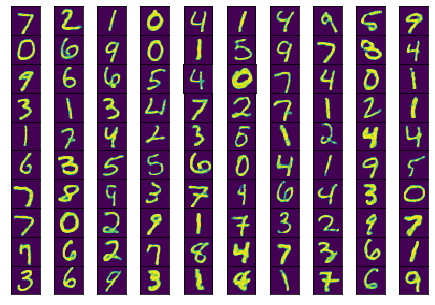

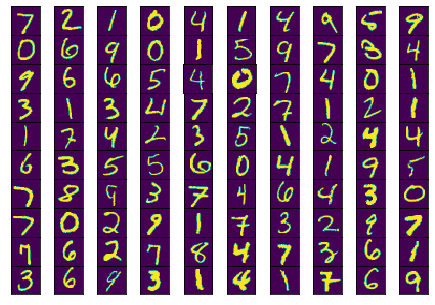

In [45]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(100):
        for start, end in zip(range(0, len(trX), 128),range(128, len(trX)+1, 128)):
            input_ = trX[start:end]
            mask_np = np.random.binomial(1,1 -corruption_level, input_.shape)
            sess.run(train_op, feed_dict={X:input_,mask:mask_np}) # 마스크와 입력데이터 위에서 받아옴
        # 이항분포로 마스크 생성 + 노이즈(원본이미지에 노이즈 를 추가했다) 
        mask_np = np.random.binomial(1,1-corruption_level, teX.shape)
        
        print(i, sess.run(cost, feed_dict={X: teX, mask:mask_np}))
    mask_np=np.random.binomial(1,1-corruption_level, teX[:100].shape)
    predicted_imgs = sess.run(predict_op, feed_dict={X: teX[:100], mask:mask_np})
    input_imgs = teX[:100]
vis(predicted_imgs,'pred') # 예측된 이미지(=가중치곱햇을때 나오는이미지)
vis(input_imgs, 'in')# 입력이미지

In [ ]:
# 원본이미지 훼손시키고 집어넣었지만 깨끗한 이미지가 나옴 ( 그래서 denoising autoencoder : )

In [ ]:
# 판별모델(discrimitive model) 과 생성모델이 있다 
# 판별모델 : 선등을 그어서 분류 하는 모델( ex. tree decision, 등)
# 생성모델: 확률을 찾아낸다 

In [ ]:
# variation autoencoder ( 변동 autoencoder)  로 인해서 나중에 GAN 등장 
# generative model : 생성모델이다 (확률-> 평균+분산이 나오고 이로인해서 분포가 나온다 
# 잠재변수(laten variables) ; 이미지를 보고 키가 몇인지, 남자인지 아닌지 특징을 잡아내는것을 잠재변수라고 한다  

# 잠재변수 그니까 중간에 데이터의 노이즈를 넣는다 (특징+노이즈) 


In [58]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
train, test = tf.keras.datasets.mnist.load_data()
train_x, train_y = train
from functools import partial
n_inputs = 28 *28
n_hidden1 = 500
n_hidden2=500
n_hidden3=20
n_hidden4=n_hidden2
n_hidden5= n_hidden1
n_outputs= n_inputs
learning_rate = 0.001
# without scaling ( 스케일링 없이 초기화한다 ) 
initializer = tf.contrib.layers.variance_scaling_initializer()

11493376/11490434 [==============================] - 1s 0us/step


In [59]:
my_dense_layer = partial(tf.layers.dense, activation=tf.nn.elu, # elu?? -> exponential linear Unit(-1을 고려한 relu이다)
                        kernel_initializer=initializer)  # 매개변수 일부를 고정하겠다는 뜻이다 (activation 와  kerneL-intializer를 고정)
X = tf.placeholder(tf.float32, [None,n_inputs])
hidden1= my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3_mean=my_dense_layer(hidden2, n_hidden3, activation=None)
hidden3_sigma=my_dense_layer(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)
hidden3=hidden3_mean + hidden3_sigma * noise # 여기가 핵심이다-> 평균, 분산*노이즈 (노이즈로 변동된 특성을 뽑아내겠다)
                                            # 노이즈를 감당할수있다 
                                              # 이 식에서 * 는 요소곱이다  
        
        
hidden4= my_dense_layer(hidden3, n_hidden4)
hidden5 = my_dense_layer(hidden4, n_hidden5)
# 자기자신값 28x28 = 784 
logits = my_dense_layer(hidden5, n_outputs,activation=None) # hidden5 가 자기자신값
outputs = tf.sigmoid(logits)                 

In [62]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=logits) # 입력값==출력값 

reconstruction_loss = tf.reduce_sum(xentropy) # 재구축손실()
eps=1e-10  # epsilon 상수 : 로그의 성질 : 0이면 무한대   --> 부동소수점을 비교 , epsilon 이 0.0001 이면 차가 0.0001이하면 같은 ??
# cost function : 지금까지 보지못했던, log likelihood 우도 확률 을 고려한 식이다. 
# 지연손실 
# 
latent_loss = 0.5 * tf.reduce_sum(tf.square(hidden3_sigma) + tf.square(hidden3_mean)-1-tf.log(eps + tf.square(hidden3_sigma)))
loss = reconstruction_loss + latent_loss
optimizer=tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

import sys
n_digits = 60
n_epochs = 50
batch_size= 150
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print('\r{}%'.format(100 * iteration // n_batches), end='')
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict= {X:X_batch})
        loss_val, reconstruction_loss_val, latent_loss_val = sess.run([loss, reconstruction_loss, 
                                                                       latent_loss], feed_dict={X:X_batch})
        print('\r{}'.format(epoch), "Train total loss:", loss_val, "\tReconstruction loss:", reconstruction_loss_val)
    codings_rnd = np.random.normal(size=[n_digits, n_hidden3])
    outputs_val = outputs.eval(feed_dict={hidden3: codings_rnd})

In [63]:
# test 데이터를 집어넣어 모델완성하면? >>> valiation encoder 망을 통과하면 무슨의미가 있나?
#>>> pca 처럼 비지도학습의 특성으로 추출된 데이터이다 ( 이걸하는이유는? >> 분류와 예측을 잘하기 위해서 ) 